In [4]:
import lxml as lxml
import requests
from bs4 import BeautifulSoup
import pandas as pd
count = 1
is_true = False
titles = []
review_content = []
ratings = []
dates = []
reviewer_name = []
headers = {
            "Accept-Language":"en-US,en;q=0.9",
            "User-Agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",
        }
for each in range(1,365):
  #amazon_url = f"https://www.amazon.com/Hunger-Games-Trilogy-Catching-Mockingjay/product-reviews/0545670314/ref=cm_cr_dp_d_show_all_btm{each}?ie=UTF8&reviewerType=all_reviews"
  amazon_url = f"https://www.amazon.com/Dice-Man-Luke-Rhinehart/product-reviews/0879518642/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
  response = requests.get(url=amazon_url, headers=headers)
  soup = BeautifulSoup(response.text, "lxml")
  # soup = BeautifulSoup(response.text, "html.parser")

  reviews_title = soup.find_all('div', {'data-hook': 'review'})
  for i in reviews_title:
      title = i.find('a', {'data-hook': 'review-title'}).text.strip()
      titles.append(title)
      body = i.find('span', {'data-hook': 'review-body'}).text.strip()
      review_content.append(body)
      rating = i.find('i',{'data-hook':'review-star-rating'}).text.strip()
      ratings.append(rating)
      date = i.find('span',{'data-hook':'review-date'}).text.strip()
      dates.append(date)
      name = i.find('span',class_='a-profile-name').text.strip()
      reviewer_name.append(name)

df1 = pd.DataFrame(titles)
df1.rename(columns={0:'title'},inplace=True)
df1['review_content'] = pd.DataFrame(review_content)
df1['ratings'] = pd.DataFrame(ratings)
df1['dates'] = pd.DataFrame(dates)
df1['dates'] = df1['dates'].str.replace('Reviewed in the United States on','').str.replace('Reviewed in the United States 🇺🇸 on','')
df1['reviewer_names'] = pd.DataFrame(reviewer_name)

print(df1)

                                                  title  \
0                         The Case of the Six-Sided Man   
1                                    Hmmm. Do not like.   
2                           Nails the Farce Called Life   
3                              Decide like the Dice Man   
4                    The Most Strange Book I Ever Read!   
...                                                 ...   
3635                   Good Read if you can stomach it.   
3636           An intriguing view on life; enlightening   
3637  I've read a good number of Chuck Palahniuk boo...   
3638                         juvenile pseudo philosophy   
3639                                       The Dice Man   

                                         review_content             ratings  \
0     'If that dice has a `one' face up, I thought, ...  5.0 out of 5 stars   
1     The main character is insane, depressed, bored...  2.0 out of 5 stars   
2     First, this is a novel not an instruction manu..

In [3]:
df1.head(10)

,title,review_content,ratings,dates,reviewer_names
0,The Case of the Six-Sided Man,"'If that dice has a `one' face up, I thought, ...",5.0 out of 5 stars,"October 17, 2012",Michael Cunningham
1,Hmmm. Do not like.,"The main character is insane, depressed, bored...",2.0 out of 5 stars,"January 21, 2011",statisticool
2,Nails the Farce Called Life,"First, this is a novel not an instruction manu...",5.0 out of 5 stars,"September 25, 2022",El Guapo
3,Decide like the Dice Man,There are two books that have profoundly shape...,5.0 out of 5 stars,"December 26, 2019",Marcel Dupasquier
4,The Most Strange Book I Ever Read!,"This is the most unbelievable, strange book I ...",5.0 out of 5 stars,"February 12, 2016",Yael Bolender
5,Good Read if you can stomach it.,Plenty of great reviews out there already. Loo...,4.0 out of 5 stars,"December 11, 2020",Jacob Moore
6,An intriguing view on life; enlightening,I initially heard about this literature approx...,5.0 out of 5 stars,"June 15, 2012",Harlan
7,I've read a good number of Chuck Palahniuk boo...,I've read a lot of dark things. I've read a go...,1.0 out of 5 stars,"June 8, 2017",Richard H. Schneeman
8,juvenile pseudo philosophy,"First and foremost, this is juvenile. Dr. Rhin...",1.0 out of 5 stars,"March 21, 2018",C. Dean
9,The Dice Man,First read this book when it was first publish...,4.0 out of 5 stars,"December 8, 2012",Alt.delete


In [2]:
df1.shape

(3640, 5)

In [3]:
df1['rating'] = df1['ratings'].str[:1]

In [34]:
df1.head()

,ID,title,review_content,ratings,dates,reviewer_names,rating
0,1,The Case of the Six-Sided Man,"'If that dice has a `one' face up, I thought, ...",5.0 out of 5 stars,"October 17, 2012",Michael Cunningham,5
1,2,Hmmm. Do not like.,"The main character is insane, depressed, bored...",2.0 out of 5 stars,"January 21, 2011",statisticool,2
2,3,Nails the Farce Called Life,"First, this is a novel not an instruction manu...",5.0 out of 5 stars,"September 25, 2022",El Guapo,5
3,4,Decide like the Dice Man,There are two books that have profoundly shape...,5.0 out of 5 stars,"December 26, 2019",Marcel Dupasquier,5
4,5,The Most Strange Book I Ever Read!,"This is the most unbelievable, strange book I ...",5.0 out of 5 stars,"February 12, 2016",Yael Bolender,5


In [35]:
df1.rating.unique()

array(['5', '2', '4', '1'], dtype=object)

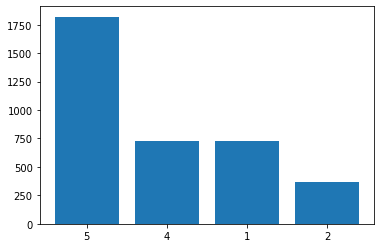

In [9]:
import matplotlib.pyplot as plt 
summarised_results = df1["rating"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [10]:
df1.isnull().sum().sort_values(ascending = False)

title             0
review_content    0
ratings           0
dates             0
reviewer_names    0
rating            0
dtype: int64

In [6]:
df1.insert(0, 'ID', range(1, 1 + len(df1)))
df1

,ID,title,review_content,ratings,dates,reviewer_names
0,1,The Case of the Six-Sided Man,"'If that dice has a `one' face up, I thought, ...",5.0 out of 5 stars,"October 17, 2012",Michael Cunningham
1,2,Hmmm. Do not like.,"The main character is insane, depressed, bored...",2.0 out of 5 stars,"January 21, 2011",statisticool
2,3,Nails the Farce Called Life,"First, this is a novel not an instruction manu...",5.0 out of 5 stars,"September 25, 2022",El Guapo
3,4,Decide like the Dice Man,There are two books that have profoundly shape...,5.0 out of 5 stars,"December 26, 2019",Marcel Dupasquier
4,5,The Most Strange Book I Ever Read!,"This is the most unbelievable, strange book I ...",5.0 out of 5 stars,"February 12, 2016",Yael Bolender
...,...,...,...,...,...,...
3635,3636,Good Read if you can stomach it.,Plenty of great reviews out there already. Loo...,4.0 out of 5 stars,"December 11, 2020",Jacob Moore
3636,3637,An intriguing view on life; enlightening,I initially heard about this literature approx...,5.0 out of 5 stars,"June 15, 2012",Harlan
3637,3638,I've read a good number of Chuck Palahniuk boo...,I've read a lot of dark things. I've read a go...,1.0 out of 5 stars,"June 8, 2017",Richard H. Schneeman
3638,3639,juvenile pseudo philosophy,"First and foremost, this is juvenile. Dr. Rhin...",1.0 out of 5 stars,"March 21, 2018",C. Dean


Text(0, 0.5, 'review Count')

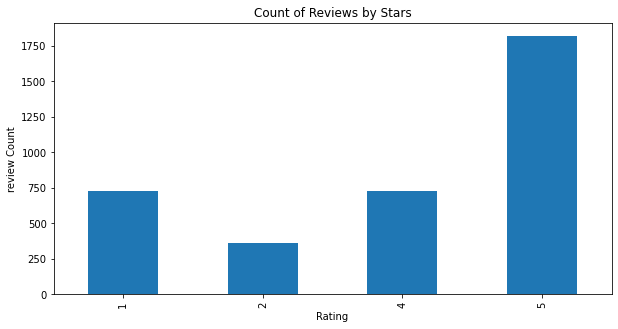

In [13]:
df1["rating"].value_counts().sort_index().plot(kind="bar",title="Count of Reviews by Stars",figsize=(10,5))
plt.xlabel("Rating")
plt.ylabel("review Count")

In [24]:
df1.head()

,ID,title,review_content,ratings,dates,reviewer_names,rating
0,1,The Case of the Six-Sided Man,"'If that dice has a `one' face up, I thought, ...",5.0 out of 5 stars,"October 17, 2012",Michael Cunningham,5
1,2,Hmmm. Do not like.,"The main character is insane, depressed, bored...",2.0 out of 5 stars,"January 21, 2011",statisticool,2
2,3,Nails the Farce Called Life,"First, this is a novel not an instruction manu...",5.0 out of 5 stars,"September 25, 2022",El Guapo,5
3,4,Decide like the Dice Man,There are two books that have profoundly shape...,5.0 out of 5 stars,"December 26, 2019",Marcel Dupasquier,5
4,5,The Most Strange Book I Ever Read!,"This is the most unbelievable, strange book I ...",5.0 out of 5 stars,"February 12, 2016",Yael Bolender,5


In [37]:
!pip install emoji --upgrade
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=46c7f347f93c16c198d0fd54ad1d85a0e9b6376df28afc01e3218e87938e8695
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0


In [8]:
import pandas as pd
import html
import re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [36]:
df1.head()

,ID,title,review_content,ratings,dates,reviewer_names,rating
0,1,The Case of the Six-Sided Man,"'If that dice has a `one' face up, I thought, ...",5.0 out of 5 stars,"October 17, 2012",Michael Cunningham,5
1,2,Hmmm. Do not like.,"The main character is insane, depressed, bored...",2.0 out of 5 stars,"January 21, 2011",statisticool,2
2,3,Nails the Farce Called Life,"First, this is a novel not an instruction manu...",5.0 out of 5 stars,"September 25, 2022",El Guapo,5
3,4,Decide like the Dice Man,There are two books that have profoundly shape...,5.0 out of 5 stars,"December 26, 2019",Marcel Dupasquier,5
4,5,The Most Strange Book I Ever Read!,"This is the most unbelievable, strange book I ...",5.0 out of 5 stars,"February 12, 2016",Yael Bolender,5


In [101]:
data = df1.drop(['ID', 'title', 'ratings', 'dates', 'reviewer_names'], axis=1)

In [102]:
data.head()

,review_content,rating
0,"'If that dice has a `one' face up, I thought, ...",5
1,"The main character is insane, depressed, bored...",2
2,"First, this is a novel not an instruction manu...",5
3,There are two books that have profoundly shape...,5
4,"This is the most unbelievable, strange book I ...",5


In [103]:
data['review_content'] = data['review_content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()

,review_content,rating
0,"'if that dice has a `one' face up, i thought, ...",5
1,"the main character is insane, depressed, bored...",2
2,"first, this is a novel not an instruction manu...",5
3,there are two books that have profoundly shape...,5
4,"this is the most unbelievable, strange book i ...",5


In [104]:
# Data cleaning process:
clean_reviews = []
for comments in data['review_content']:
    comments = ''.join(c for c in comments if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    clean_reviews.append(comments)
    
df2 = pd.DataFrame()
df2['Clean_review'] = clean_reviews
#data.append(df2,ignore_index=True)
extracted_col = df2['Clean_review']

data = data.join(extracted_col)


In [105]:
data.head()

,review_content,rating,Clean_review
0,"'if that dice has a `one' face up, i thought, ...",5,"'if that dice has a `one' face up, i thought, ..."
1,"the main character is insane, depressed, bored...",2,"the main character is insane, depressed, bored..."
2,"first, this is a novel not an instruction manu...",5,"first, this is a novel not an instruction manu..."
3,there are two books that have profoundly shape...,5,there are two books that have profoundly shape...
4,"this is the most unbelievable, strange book i ...",5,"this is the most unbelievable, strange book i ..."


In [106]:
# Removing punctuations
data['Clean_review'] = data['Clean_review'].str.replace('[^\w\s]','')
data.head()

<ipython-input-106-d0cf13b9a730>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Clean_review'] = data['Clean_review'].str.replace('[^\w\s]','')


,review_content,rating,Clean_review
0,"'if that dice has a `one' face up, i thought, ...",5,if that dice has a one face up i thought im go...
1,"the main character is insane, depressed, bored...",2,the main character is insane depressed bored d...
2,"first, this is a novel not an instruction manu...",5,first this is a novel not an instruction manua...
3,there are two books that have profoundly shape...,5,there are two books that have profoundly shape...
4,"this is the most unbelievable, strange book i ...",5,this is the most unbelievable strange book i e...


In [107]:
# Removing stop words
data['Clean_review']  = data['Clean_review'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head()

,review_content,rating,Clean_review
0,"'if that dice has a `one' face up, i thought, ...",5,dice one face thought im going downstairs rape...
1,"the main character is insane, depressed, bored...",2,main character insane depressed bored drugged ...
2,"first, this is a novel not an instruction manu...",5,first novel instruction manual evidently cult ...
3,there are two books that have profoundly shape...,5,two books profoundly shaped way perceive world...
4,"this is the most unbelievable, strange book i ...",5,unbelievable strange book ever read quite done...


In [108]:
#tokens = nltk.word_tokenize(text)    
 
data['Clean_review_tokenized'] = data.apply(lambda row: nltk.word_tokenize(row['Clean_review']), axis=1)

In [96]:
data.head()

,review_content,rating,Clean_review,Clean_review_tokenized
0,"'if that dice has a `one' face up, i thought, ...",5,dice one face thought im going downstairs rape...,"[dice, one, face, thought, im, going, downstai..."
1,"the main character is insane, depressed, bored...",2,main character insane depressed bored drugged ...,"[main, character, insane, depressed, bored, dr..."
2,"first, this is a novel not an instruction manu...",5,first novel instruction manual evidently cult ...,"[first, novel, instruction, manual, evidently,..."
3,there are two books that have profoundly shape...,5,two books profoundly shaped way perceive world...,"[two, books, profoundly, shaped, way, perceive..."
4,"this is the most unbelievable, strange book i ...",5,unbelievable strange book ever read quite done...,"[unbelievable, strange, book, ever, read, quit..."


In [110]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(comments):
    comments = [wordnet_lemmatizer.lemmatize(word) for word in comments]
    return ' '.join(comments)

data['Clean_review_lemmatized'] = data['Clean_review_tokenized'].apply(lambda x: lemmatizer(x))
data.head()

,review_content,rating,Clean_review,Clean_review_tokenized,Clean_review_lemmatized
0,"'if that dice has a `one' face up, i thought, ...",5,dice one face thought im going downstairs rape...,"[dice, one, face, thought, im, going, downstai...",dice one face thought im going downstairs rape...
1,"the main character is insane, depressed, bored...",2,main character insane depressed bored drugged ...,"[main, character, insane, depressed, bored, dr...",main character insane depressed bored drugged ...
2,"first, this is a novel not an instruction manu...",5,first novel instruction manual evidently cult ...,"[first, novel, instruction, manual, evidently,...",first novel instruction manual evidently cult ...
3,there are two books that have profoundly shape...,5,two books profoundly shaped way perceive world...,"[two, books, profoundly, shaped, way, perceive...",two book profoundly shaped way perceive world ...
4,"this is the most unbelievable, strange book i ...",5,unbelievable strange book ever read quite done...,"[unbelievable, strange, book, ever, read, quit...",unbelievable strange book ever read quite done...


In [111]:
final_data = data.drop(['review_content', 'Clean_review', 'Clean_review_tokenized'], axis=1)

In [115]:
final_data.head()

,rating,Clean_review_lemmatized
0,5,dice one face thought im going downstairs rape...
1,2,main character insane depressed bored drugged ...
2,5,first novel instruction manual evidently cult ...
3,5,two book profoundly shaped way perceive world ...
4,5,unbelievable strange book ever read quite done...


In [116]:
final_data.insert(0, 'ID', range(1, 1 + len(final_data)))
final_data.head()

,ID,rating,Clean_review_lemmatized
0,1,5,dice one face thought im going downstairs rape...
1,2,2,main character insane depressed bored drugged ...
2,3,5,first novel instruction manual evidently cult ...
3,4,5,two book profoundly shaped way perceive world ...
4,5,5,unbelievable strange book ever read quite done...


In [117]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [118]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [119]:
texts = {}
for i in range(final_data.shape[0]):
    text = final_data.loc[i,"Clean_review_lemmatized"]
    iD = final_data.loc[i,"ID"]
    texts[iD] = sia.polarity_scores(text)

print(pd.DataFrame(texts).T.head())
vader = pd.DataFrame(texts).T.reset_index().rename(columns={"index":"ID"})

     neg    neu    pos  compound
1  0.175  0.638  0.187   -0.6866
2  0.186  0.598  0.215    0.8982
3  0.000  0.887  0.113    0.3182
4  0.049  0.727  0.225    0.9840
5  0.112  0.599  0.289    0.9609


In [161]:
vader.head()

,ID,neg,neu,pos,compound,rating,Clean_review_lemmatized,vader_sentiment,vader_score
0,1,0.175,0.638,0.187,-0.6866,5,dice one face thought im going downstairs rape...,Negative,-0.6866
1,2,0.186,0.598,0.215,0.8982,2,main character insane depressed bored drugged ...,Neutral,0.8982
2,3,0.000,0.887,0.113,0.3182,5,first novel instruction manual evidently cult ...,Positive,0.3182
3,4,0.049,0.727,0.225,0.9840,5,two book profoundly shaped way perceive world ...,Neutral,0.9840
4,5,0.112,0.599,0.289,0.9609,5,unbelievable strange book ever read quite done...,Neutral,0.9609


In [121]:
vader = pd.merge(vader,final_data,how="left")
vader.head()

,ID,neg,neu,pos,compound,rating,Clean_review_lemmatized
0,1,0.175,0.638,0.187,-0.6866,5,dice one face thought im going downstairs rape...
1,2,0.186,0.598,0.215,0.8982,2,main character insane depressed bored drugged ...
2,3,0.000,0.887,0.113,0.3182,5,first novel instruction manual evidently cult ...
3,4,0.049,0.727,0.225,0.9840,5,two book profoundly shaped way perceive world ...
4,5,0.112,0.599,0.289,0.9609,5,unbelievable strange book ever read quite done...


In [122]:
vader.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 0 to 3639
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3640 non-null   int64  
 1   neg                      3640 non-null   float64
 2   neu                      3640 non-null   float64
 3   pos                      3640 non-null   float64
 4   compound                 3640 non-null   float64
 5   rating                   3640 non-null   object 
 6   Clean_review_lemmatized  3640 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 227.5+ KB


In [123]:
vader['rating'] = vader['rating'].astype(int)

Text(0.5, 1.0, 'Compound')

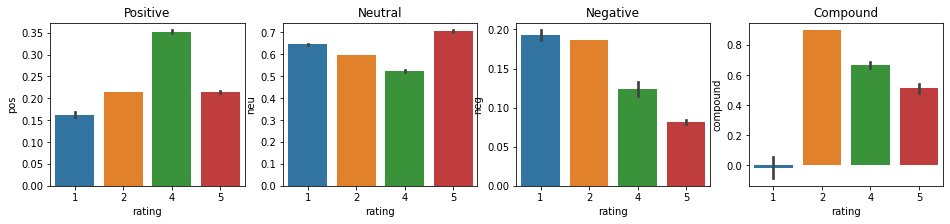

In [125]:
#Hypothesis: more positive ratings mean more positive compound scores
##vader model
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,4,figsize=(16,3))
sns.barplot(data=vader, x="rating", y="pos", ax=axs[0])
sns.barplot(data=vader, x="rating", y="neu", ax=axs[1])
sns.barplot(data=vader, x="rating", y="neg", ax=axs[2])
sns.barplot(data=vader, x="rating", y="compound", ax=axs[3])

axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
axs[3].set_title("Compound")

#This confirms that higher ratings express more positive scores

In [126]:
vader.head()

,ID,neg,neu,pos,compound,rating,Clean_review_lemmatized
0,1,0.175,0.638,0.187,-0.6866,5,dice one face thought im going downstairs rape...
1,2,0.186,0.598,0.215,0.8982,2,main character insane depressed bored drugged ...
2,3,0.000,0.887,0.113,0.3182,5,first novel instruction manual evidently cult ...
3,4,0.049,0.727,0.225,0.9840,5,two book profoundly shaped way perceive world ...
4,5,0.112,0.599,0.289,0.9609,5,unbelievable strange book ever read quite done...


In [138]:
import numpy as np
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(vader['Clean_review_lemmatized'])):
    
    score = analyser.polarity_scores(vader['Clean_review_lemmatized'][i])
    score=score['compound']
    scores.append(score)
    
    vader_sentiment=[]
    for i in scores:
        if (i>=0.05) and (i<0.75):
            vader_sentiment.append('Positive')
        elif (i<=-0.05) and (i>-0.75):
            vader_sentiment.append('Negative')
        else:
            vader_sentiment.append('Neutral')
vader['vader_sentiment']= pd.Series(np.array(vader_sentiment))
vader['vader_score']= pd.Series(np.array(scores))

In [139]:
vader.head()


,ID,neg,neu,pos,compound,rating,Clean_review_lemmatized,vader_sentiment,vader_score
0,1,0.175,0.638,0.187,-0.6866,5,dice one face thought im going downstairs rape...,Negative,-0.6866
1,2,0.186,0.598,0.215,0.8982,2,main character insane depressed bored drugged ...,Neutral,0.8982
2,3,0.000,0.887,0.113,0.3182,5,first novel instruction manual evidently cult ...,Positive,0.3182
3,4,0.049,0.727,0.225,0.9840,5,two book profoundly shaped way perceive world ...,Neutral,0.9840
4,5,0.112,0.599,0.289,0.9609,5,unbelievable strange book ever read quite done...,Neutral,0.9609


In [140]:
vader_model = vader.drop(['neg','neu', 'pos', 'compound'], axis=1)

In [151]:
vader_model.head()

,ID,rating,Clean_review_lemmatized,vader_sentiment,vader_score
0,1,5,dice one face thought im going downstairs rape...,Negative,-0.6866
1,2,2,main character insane depressed bored drugged ...,Neutral,0.8982
2,3,5,first novel instruction manual evidently cult ...,Positive,0.3182
3,4,5,two book profoundly shaped way perceive world ...,Neutral,0.9840
4,5,5,unbelievable strange book ever read quite done...,Neutral,0.9609


In [141]:
vader_model.groupby(by="vader_sentiment").mean()


,ID,rating,vader_score
vader_sentiment,,,
Negative,1816.000000,5.000000,-0.686600
Neutral,1821.428571,3.285714,0.674557
Positive,1819.500000,4.500000,0.360050


In [149]:
graph_vader = vader_model.groupby('vader_sentiment').count()['Clean_review_lemmatized'].reset_index().sort_values(by='Clean_review_lemmatized',ascending=False)
graph_vader.style.background_gradient(cmap='Purples')

,vader_sentiment,Clean_review_lemmatized
1,Neutral,2548
2,Positive,728
0,Negative,364


In [142]:
final_data.head()

,ID,rating,Clean_review_lemmatized
0,1,5,dice one face thought im going downstairs rape...
1,2,2,main character insane depressed bored drugged ...
2,3,5,first novel instruction manual evidently cult ...
3,4,5,two book profoundly shaped way perceive world ...
4,5,5,unbelievable strange book ever read quite done...


In [143]:
from textblob import TextBlob
def subjectivity(Clean_review_lemmatized):
  return TextBlob(Clean_review_lemmatized).sentiment.subjectivity
def polarity(Clean_review_lemmatized):
  return TextBlob(Clean_review_lemmatized).sentiment.polarity
def res(val):
  if val<0:
    return 'negative'
  if val==0:
    return 'neutral'
  if val>0:
    return 'positive'

In [147]:
subjectivity_col=final_data['Clean_review_lemmatized'].apply(subjectivity)
polarity_col=final_data['Clean_review_lemmatized'].apply(polarity)
res_col=polarity_col.apply(res)

new_df={'ID':final_data['ID'],'Clean_review_lemmatized':final_data['Clean_review_lemmatized'],'rating':final_data['rating'],'subjectivity':subjectivity_col,'polarity': polarity_col,'textblob_sentiment':res_col}
textblob=pd.DataFrame(new_df)
textblob.head()

,ID,Clean_review_lemmatized,rating,subjectivity,polarity,textblob_sentiment
0,1,dice one face thought im going downstairs rape...,5,0.600774,0.121242,positive
1,2,main character insane depressed bored drugged ...,2,0.619795,-0.042409,negative
2,3,first novel instruction manual evidently cult ...,5,0.291667,0.250000,positive
3,4,two book profoundly shaped way perceive world ...,5,0.615023,0.236508,positive
4,5,unbelievable strange book ever read quite done...,5,0.583191,0.030283,positive


In [150]:
graph_textblob = textblob.groupby('textblob_sentiment').count()['Clean_review_lemmatized'].reset_index().sort_values(by='Clean_review_lemmatized',ascending=False)
graph_textblob.style.background_gradient(cmap='Purples')

,textblob_sentiment,Clean_review_lemmatized
1,positive,2548
0,negative,1092


In [153]:
vader_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 0 to 3639
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3640 non-null   int64  
 1   rating                   3640 non-null   int64  
 2   Clean_review_lemmatized  3640 non-null   object 
 3   vader_sentiment          3640 non-null   object 
 4   vader_score              3640 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 299.7+ KB


In [156]:
textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3640 non-null   int64  
 1   Clean_review_lemmatized  3640 non-null   object 
 2   rating                   3640 non-null   int64  
 3   subjectivity             3640 non-null   float64
 4   polarity                 3640 non-null   float64
 5   textblob_sentiment       3640 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 170.8+ KB


In [155]:
textblob['rating'] = textblob['rating'].astype(int)

In [162]:
fin_data = pd.merge(vader_model,textblob,how="left")
fin_data.head()

,ID,rating,Clean_review_lemmatized,vader_sentiment,vader_score,subjectivity,polarity,textblob_sentiment
0,1,5,dice one face thought im going downstairs rape...,Negative,-0.6866,0.600774,0.121242,positive
1,2,2,main character insane depressed bored drugged ...,Neutral,0.8982,0.619795,-0.042409,negative
2,3,5,first novel instruction manual evidently cult ...,Positive,0.3182,0.291667,0.250000,positive
3,4,5,two book profoundly shaped way perceive world ...,Neutral,0.9840,0.615023,0.236508,positive
4,5,5,unbelievable strange book ever read quite done...,Neutral,0.9609,0.583191,0.030283,positive
